# Preparing Santiago weather station data

In [45]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5

import warnings
warnings.filterwarnings('ignore')

In [46]:
#read dataset
df = pd.read_csv("../data/GSOD/merged_cities/SANTIAGO.csv")

In [47]:
df

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,0,8042099999,1990-01-01,42.896333,-8.415144,369.72,"SANTIAGO, SP",46.5,24,43.5,...,9.9,999.9,52.2,,41.0,*,0.00,H,999.9,110000
1,1,8042099999,1990-01-02,42.896333,-8.415144,369.72,"SANTIAGO, SP",44.1,24,37.5,...,22.0,29.9,48.2,,39.2,*,0.00,H,999.9,10000
2,2,8042099999,1990-01-03,42.896333,-8.415144,369.72,"SANTIAGO, SP",43.3,24,42.5,...,12.0,20.0,47.1,,39.2,,0.47,F,999.9,10000
3,3,8042099999,1990-01-04,42.896333,-8.415144,369.72,"SANTIAGO, SP",43.9,24,42.9,...,8.0,999.9,47.5,,40.1,,0.05,F,999.9,10000
4,4,8042099999,1990-01-05,42.896333,-8.415144,369.72,"SANTIAGO, SP",49.3,24,47.8,...,12.0,999.9,53.6,*,44.6,,0.02,E,999.9,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,10865,8042099999,2019-11-14,42.896333,-8.415144,369.72,"SANTIAGO, SP",43.4,24,40.1,...,31.1,48.0,48.2,*,39.2,*,0.34,G,0.4,10000
10866,10866,8042099999,2019-11-15,42.896333,-8.415144,369.72,"SANTIAGO, SP",40.9,24,38.3,...,15.9,27.0,46.4,*,37.8,,0.66,G,999.9,10000
10867,10867,8042099999,2019-11-16,42.896333,-8.415144,369.72,"SANTIAGO, SP",42.0,24,40.8,...,8.9,999.9,46.4,*,35.4,,0.53,G,0.4,110000
10868,10868,8042099999,2019-11-17,42.896333,-8.415144,369.72,"SANTIAGO, SP",47.4,24,45.7,...,12.0,999.9,51.8,*,42.8,*,0.13,G,999.9,110000


In [48]:
# drop old index column
df.drop(["Unnamed: 0"], axis=1, inplace=True)

# drop redundant column swith info about weather station
df.drop(["STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME"], axis=1, inplace=True)

# drop "attributes"
df.drop(["TEMP_ATTRIBUTES", "DEWP_ATTRIBUTES", "SLP_ATTRIBUTES", "STP_ATTRIBUTES", 
         "VISIB_ATTRIBUTES", "WDSP_ATTRIBUTES", "MAX_ATTRIBUTES", "MIN_ATTRIBUTES", "PRCP_ATTRIBUTES"], 
        axis=1, inplace=True)

# drop redundant weather info (max speed of wind, maximum wind gust, min and max temperature, snow depth,  
# indicator for occurrence of: fog, rain or drizzle, snow or ice pellets, hail, thunder, 
# tornado/funnel cloud respectively )
df.drop(["MXSPD", "GUST", "MAX", "MIN", "SNDP", "FRSHTT"], axis=1, inplace=True)

In [49]:
# change index
df.set_index([pd.to_datetime(df.DATE)], inplace=True)
df.drop(["DATE"], axis=1, inplace=True)

In [50]:
df.head()

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
DATE,,,,,,,
1990-01-01,46.5,43.5,9999.9,999.9,5.4,3.7,0.00
1990-01-02,44.1,37.5,9999.9,999.9,6.4,12.9,0.00
1990-01-03,43.3,42.5,9999.9,999.9,6.6,7.5,0.47
1990-01-04,43.9,42.9,9999.9,999.9,5.5,6.4,0.05
1990-01-05,49.3,47.8,9999.9,999.9,5.0,4.1,0.02


__Missing data handling__

In [51]:
df.isna().sum()

TEMP     0
DEWP     0
SLP      0
STP      0
VISIB    0
WDSP     0
PRCP     0
dtype: int64

As we can see, there are no nans in the data

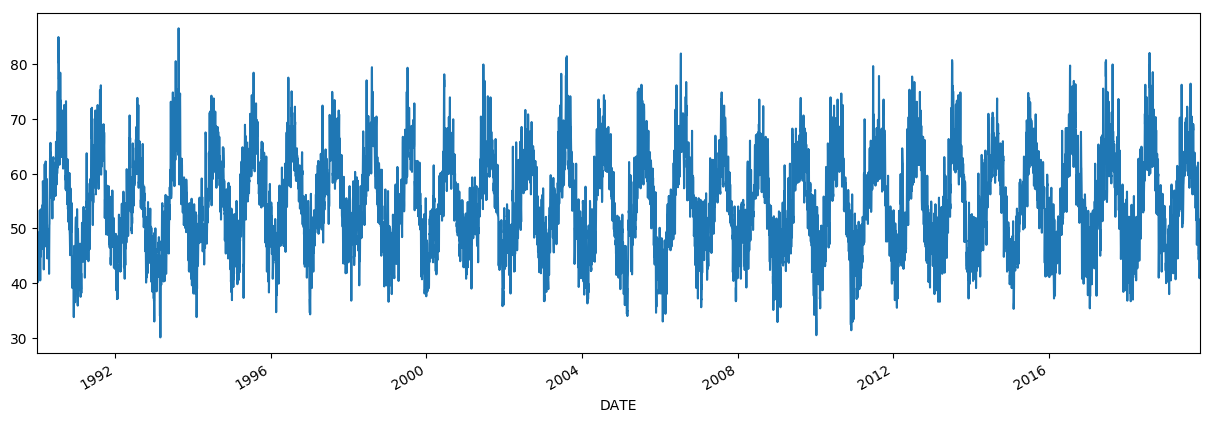

In [52]:
df.TEMP.plot()

In [53]:
all_days = [str(day)[4:10] for day in pd.date_range(start='1/1/' + "2018", end='1/1/' + "2019")[:-1]]
missing_days = []

for year in range(1990, 2019):
    for day in all_days:
        if (str(year) + day not in df.index):
            missing_days.append(str(year) + day)
            
missing_days

['1993-05-10',
 '1996-02-10',
 '1998-10-01',
 '1999-01-10',
 '1999-10-30',
 '1999-10-31',
 '1999-11-01',
 '2000-05-08',
 '2000-05-09',
 '2000-05-10',
 '2000-05-14',
 '2001-06-16',
 '2001-06-17',
 '2015-04-08',
 '2015-04-09',
 '2015-04-10',
 '2015-04-11',
 '2015-04-12',
 '2015-04-13',
 '2015-04-14',
 '2015-04-15',
 '2015-04-16',
 '2015-04-17',
 '2015-04-18',
 '2015-04-19',
 '2015-04-20',
 '2015-04-21',
 '2015-04-22',
 '2015-04-23',
 '2015-04-24',
 '2015-04-25',
 '2015-04-26',
 '2015-04-27',
 '2015-04-28',
 '2018-11-17',
 '2018-11-18',
 '2018-11-19',
 '2018-11-20',
 '2018-11-21',
 '2018-11-22']

There are some missing days, so lets impute them.

In [54]:
# returns mean value for exact day of a year
def column_mean(df, column, date):
    total = 0
    all_years = [day for day in df.index if (str(date)[4:] in str(day) and str(date)[:4] not in str(day))]
    
    for year in all_years:
        total += df.at[year, column]
    
    return (total / len(all_years))

In [55]:
def insert_day(df, date, all_days):
    first =  df.loc[:date, :]
    second = df.loc[date:, :]
    day = {col:[column_mean(df, col, date)] for col in df.columns}
    
    return pd.concat([first, pd.DataFrame(data=day, index=[pd.to_datetime(date)]), second])

In [56]:
for day in missing_days:
    df = insert_day(df, day, all_days)

In [57]:
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
1990-01-01,46.5,43.5,9999.9,999.9,5.4,3.7,0.00
1990-01-02,44.1,37.5,9999.9,999.9,6.4,12.9,0.00
1990-01-03,43.3,42.5,9999.9,999.9,6.6,7.5,0.47
1990-01-04,43.9,42.9,9999.9,999.9,5.5,6.4,0.05
1990-01-05,49.3,47.8,9999.9,999.9,5.0,4.1,0.02
...,...,...,...,...,...,...,...
2019-11-14,43.4,40.1,9999.9,999.9,5.6,10.5,0.34
2019-11-15,40.9,38.3,9999.9,999.9,6.2,6.2,0.66
2019-11-16,42.0,40.8,9999.9,999.9,5.3,3.2,0.53
2019-11-17,47.4,45.7,9999.9,999.9,4.5,5.4,0.13


__Data reduction__

As we have daily data for 30 years (more that 10,000 instances), it will take a lot of time to fit good model for such big data. Here I reduce daily data to weekly, by taking mean of whole week as value of that one week 

In [58]:
# returns dict with mean values of corresponding column at the certain week 
def week_mean(df, date):
    week = dict()
    
    digits = list(date)
    digits[-2:] = str(int("".join(digits[-2:])) + 6)
    end = "".join(digits)
    
    data = df.loc[date:end, :]
    
    for col in data.columns:
        week[col] = data[col].mean()
    
    return week

In [59]:
# generates month data
def create_month_data(df, year_n_month):
    month = dict()
    for col in df.columns:
        month[col] = []
    
    checkpoints = ["-01", "-08", "-15", "-22"]
    indexes = [year_n_month + day for day in checkpoints]
    
    for idx in indexes:
        week = week_mean(df, idx)
        for i in month.keys():
            month[i].append(week[i])
            
    new_month = pd.DataFrame(data=month, index=indexes)
    
    return new_month

In [60]:
def reduce_dataset(df):
    months = [str(year_n_month)[:7] for year_n_month in df.index if str(year_n_month)[8:10] == "01"]

    new_months = [create_month_data(df, month) for month in months]
    
    df = pd.concat(new_months)
    
    return df

In [61]:
df =  reduce_dataset(df)

In [62]:
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
1990-01-01,44.857143,42.728571,9999.9,999.9,5.400000,6.042857,0.268571
1990-01-08,43.485714,37.042857,9999.9,999.9,5.671429,3.071429,0.002857
1990-01-15,44.285714,38.557143,9999.9,999.9,5.028571,3.914286,0.004286
1990-01-22,47.500000,45.485714,9999.9,999.9,5.357143,9.385714,0.375714
1990-02-01,49.657143,45.071429,9999.9,999.9,5.657143,12.257143,0.500000
...,...,...,...,...,...,...,...
2019-10-22,55.457143,51.228571,9999.9,999.9,6.042857,5.985714,0.098571
2019-11-01,52.600000,51.342857,9999.9,999.9,5.014286,7.428571,0.540000
2019-11-08,47.757143,45.671429,9999.9,999.9,4.885714,5.785714,0.437143
2019-11-15,43.775000,41.925000,9999.9,999.9,5.425000,4.075000,0.427500


In [63]:
df[df.TEMP.isnull()].index.tolist()

['2019-11-22']

As we can see, during data reduction new missing values appear, so here I impute them

In [64]:
for indx in df[df.TEMP.isnull()].index.tolist():
    for col in df.columns:
        df.xs(indx)[col] = column_mean(df, col, indx)

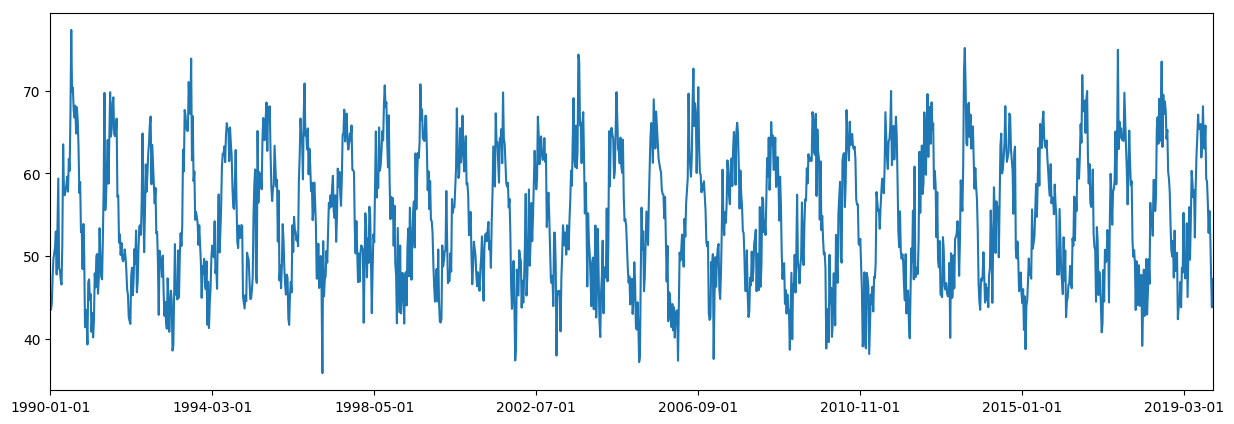

In [65]:
df.TEMP.plot()

Now, our data is cleaned, reduced in more than 7 times and without missing values

In [66]:
df.describe()

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,54.605446,52.397955,6965.871299,991.531839,24.342463,6.486184,0.645615
std,7.950816,75.256044,4122.716710,11.861648,79.236727,12.006884,3.297651
min,35.814286,26.714286,994.985714,951.942857,2.842857,1.800000,0.000000
25%,47.892857,43.325000,1025.492857,979.425862,5.157143,4.682143,0.008571
50%,53.871429,48.421429,9999.900000,999.900000,5.728571,5.614286,0.081429
75%,61.164286,54.453571,9999.900000,999.900000,6.228571,6.871429,0.264286
max,77.385714,1470.817787,9999.900000,999.900000,857.457143,291.771429,57.142857


__Outliers__

In [75]:
def replace_outliers(df, column):
    m = df[column].mean()
    std = df[column].std()
    
    for index, row in df.iterrows():
        if (abs(row[column]) > m + 3 * std):
            df.xs(index)[column] = column_mean(df, column, index)
    return df

In columns DEWP, VISIB, WDSP and PRCP there are some outliers, so lets replace them with mean value.

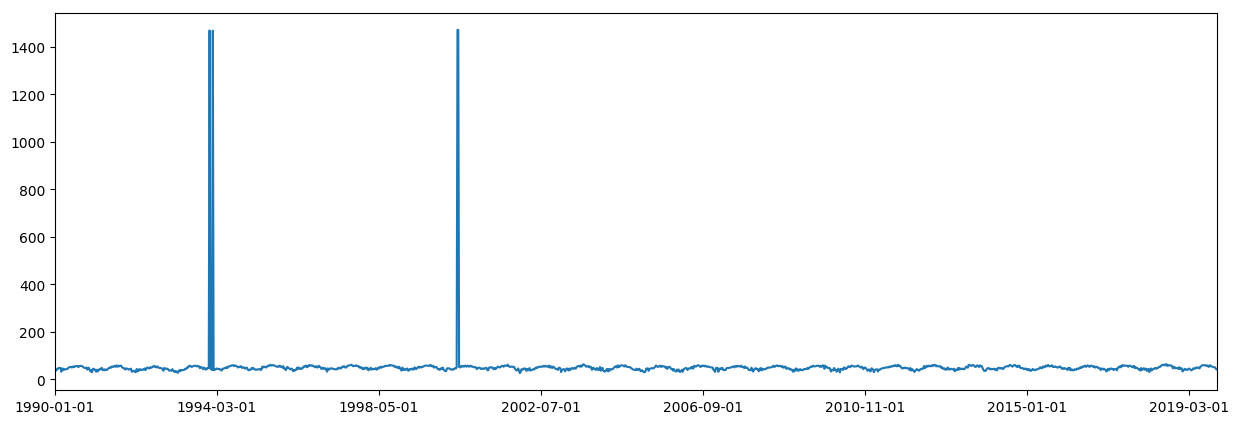

In [76]:
df.DEWP.plot()

In [77]:
df = replace_outliers(df, "DEWP")

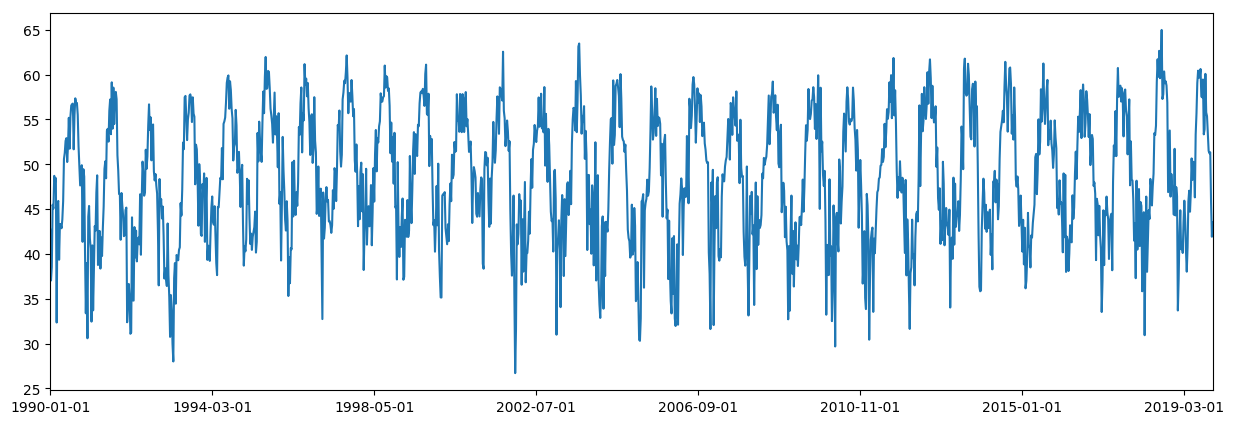

In [78]:
df.DEWP.plot()

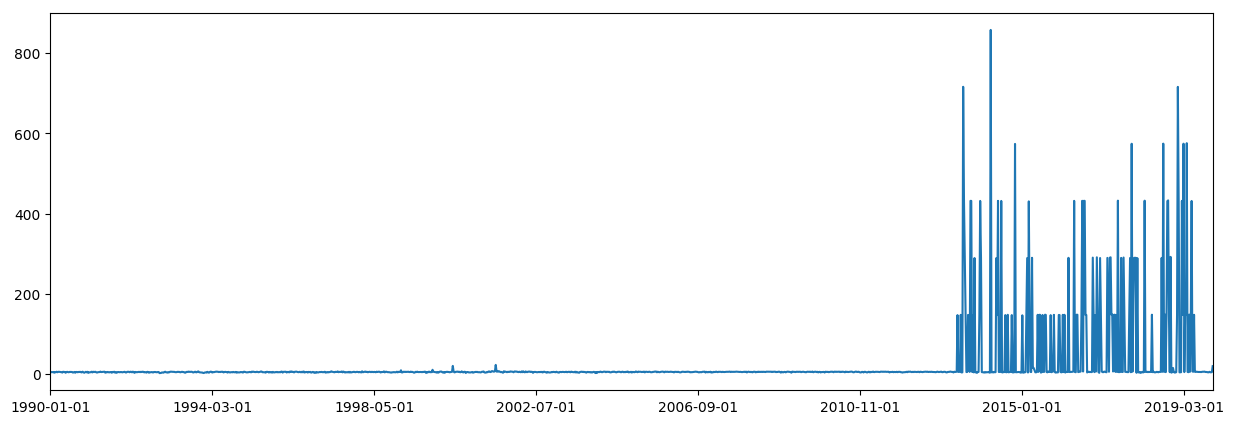

In [79]:
df.VISIB.plot()

In [80]:
df = replace_outliers(df, "VISIB")

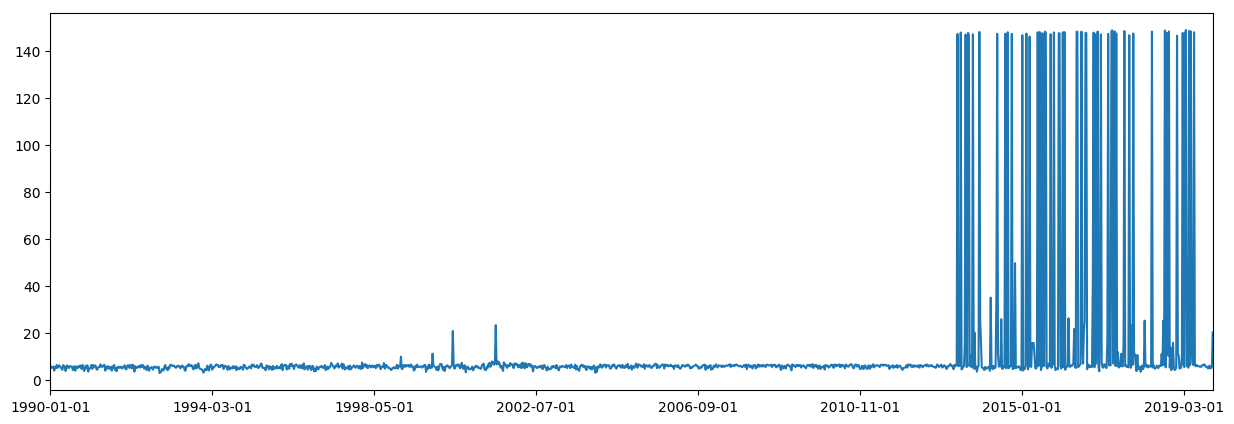

In [81]:
df.VISIB.plot()

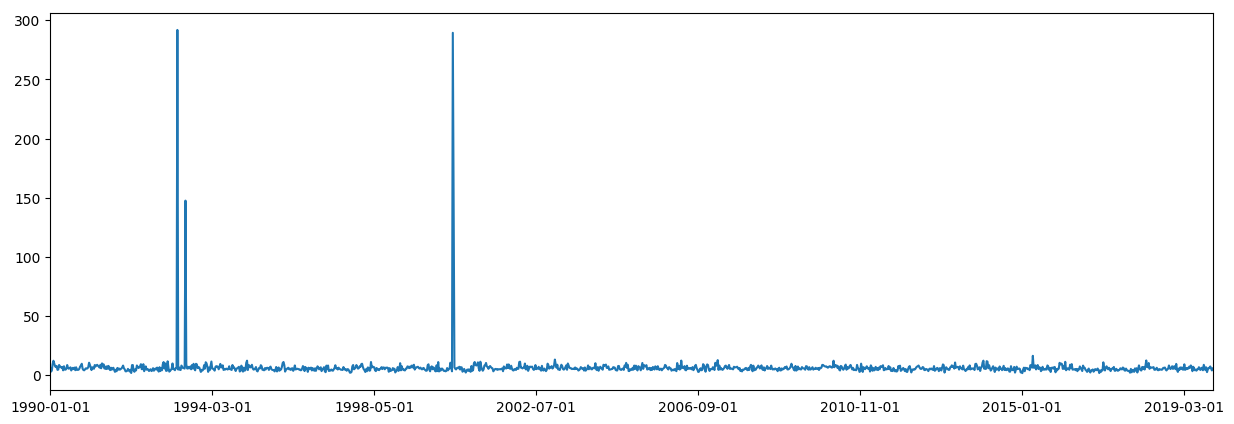

In [82]:
df.WDSP.plot()

In [83]:
df = replace_outliers(df, "WDSP")

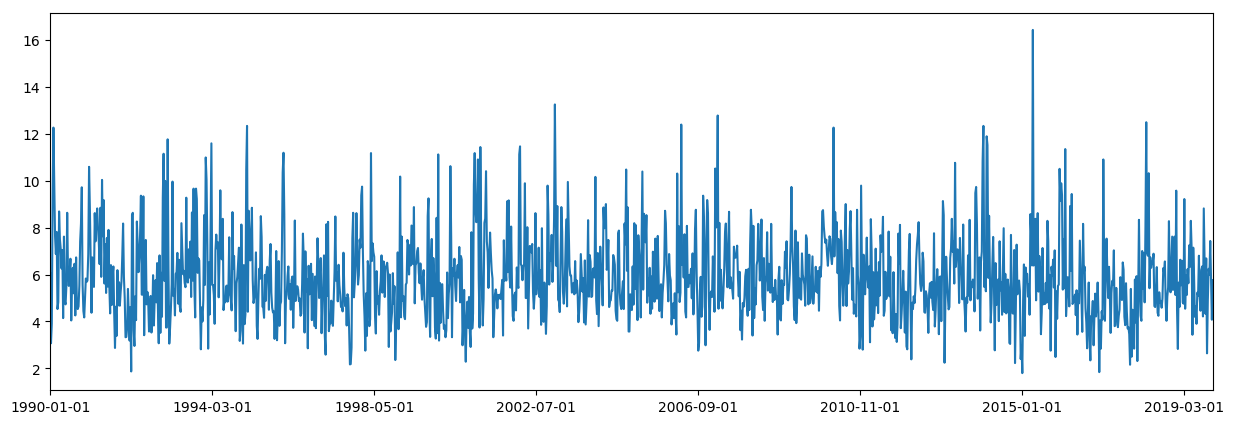

In [84]:
df.WDSP.plot()

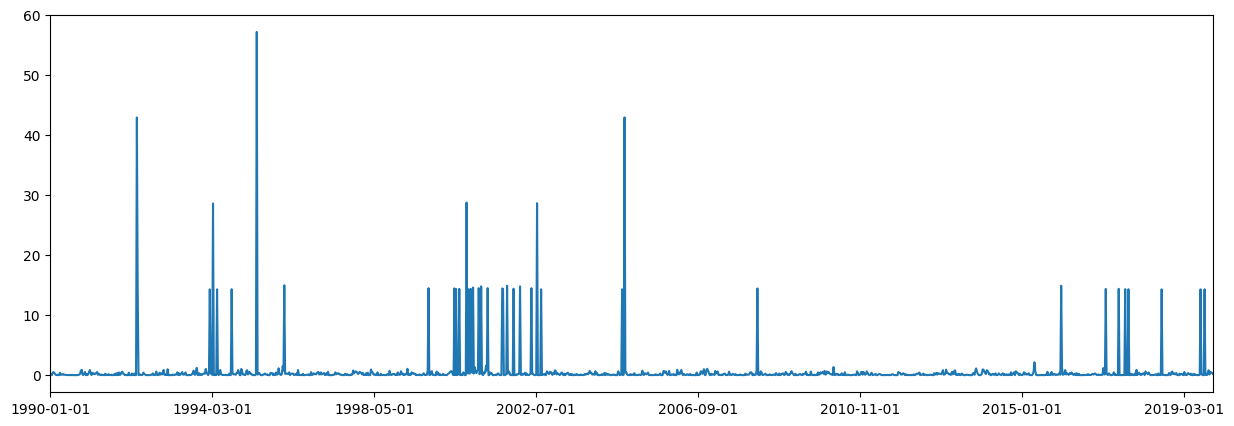

In [85]:
df.PRCP.plot()

In [86]:
df = replace_outliers(df, "PRCP")

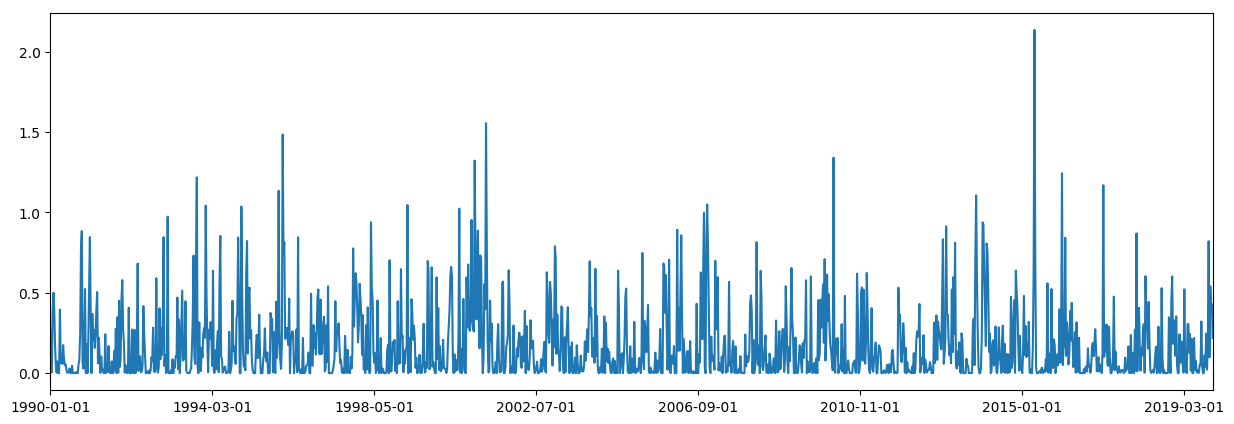

In [87]:
df.PRCP.plot()

In [88]:
df.describe()

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,54.605446,48.429822,6965.871299,991.531839,11.453866,5.892031,0.172717
std,7.950816,7.110313,4122.716710,11.861648,27.374334,1.814872,0.232654
min,35.814286,26.714286,994.985714,951.942857,2.842857,1.800000,0.000000
25%,47.892857,43.310714,1025.492857,979.425862,5.157143,4.682143,0.008571
50%,53.871429,48.400000,9999.900000,999.900000,5.721429,5.614286,0.080000
75%,61.164286,54.392857,9999.900000,999.900000,6.200000,6.842857,0.243214
max,77.385714,64.985714,9999.900000,999.900000,149.014286,16.416256,2.134236


In [89]:
df.to_csv("../analysis/Santiago.csv")